<a href="https://colab.research.google.com/github/catastropiyush/coursework-notebooks/blob/main/molecular_visualization_py3dmol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

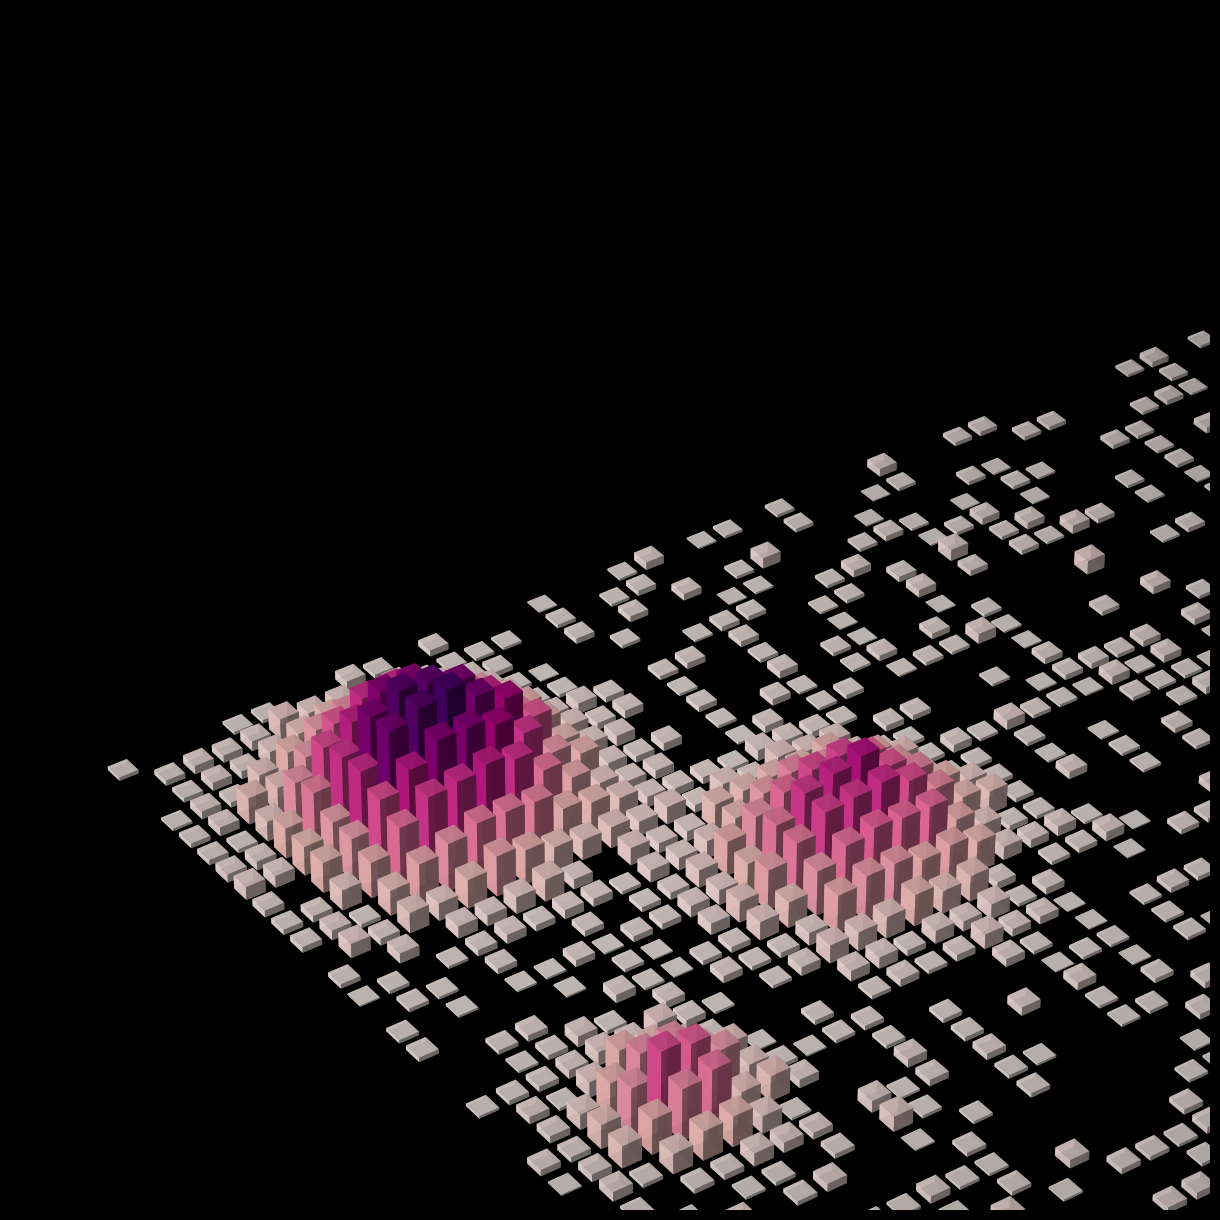

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

def create_3d_bars_with_colormap(background_color='black', use_custom_colormap=True):
    # Generate sample data for the 3D bar chart
# Generate sample data for the 3D bar chart
    n = 45  # Increased grid density to match the image
    x = np.linspace(0, 20, n)
    y = np.linspace(0, 20, n)
    X, Y = np.meshgrid(x, y)

    # Create three main peaks in the data
    Z = np.zeros((n, n))
    Z += 1.5 * np.exp(-((X-3)**2 + (Y-3)**2) / 3)  # First peak
    Z += 1.0 * np.exp(-((X-7)**2 + (Y-7)**2) / 2.5)  # Third peak

    # Add smaller secondary peaks for texture
    #Z += 1.5 * np.exp(-((X-2)**2 + (Y-5)**2) / 1.5)  # Small peak
    #Z += 1.2 * np.exp(-((X-8)**2 + (Y-6)**2) / 1.2)  # Small peak
    Z += 0.8 * np.exp(-((X-10)**2 + (Y-2)**2) / 1.0)  # Small peak

    # Add subtle noise for texture
    Z += np.random.normal(0, 0.05, Z.shape)

    # Create the 3D bar plot with specified background color
    fig = plt.figure(figsize=(14, 12), facecolor=background_color)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_facecolor(background_color)

    # Create a custom colormap to match the golden-orange gradient in the image
    if use_custom_colormap:
        colors = [
            (0.05, 0.05, 0.08),  # Dark blue-black for base
            (0.4, 0.0, 0.0),     # Deep red
            (0.0, 0.5, 0.5),     # Teal for midpoint
            (1.0, 0.6, 0.0),     # Gold-orange
            (1.0, 0.9, 0.4)      # Light gold for peaks
        ]
        cmap = LinearSegmentedColormap.from_list("nature_gold_teal", colors)
    else:
        cmap = plt.cm.RdPu  # Use predefined colormap

    # Calculate the distance from center for fading effect
    center_x, center_y = 5, 5
    distance = np.sqrt((X - center_x)**2 + (Y - center_y)**2)
    max_distance = np.max(distance)
    fade_factor = 1 - (distance / max_distance) * 0.5  # Reduced fade intensity

    # Bar width - smaller bars with slight gap to match image
    dx = dy = 0.3

    # Plot the bars to match the image styling
    for i in range(n):
        for j in range(n):
            # Use height to determine color (normalized)
            color_val = Z[i, j] / Z.max()

            # Only plot bars with significant height
            if Z[i, j] > 0.01:
                # Base color from height (using our colormap)
                base_color = cmap(color_val)

                # Apply distance fading
                faded_color = list(base_color)
                faded_color[3] = max(0.3, fade_factor[i, j])  # Ensure minimum visibility

                # Plot the bar
                ax.bar3d(
                    X[i, j], Y[i, j], 0,
                    dx, dy, Z[i, j],
                    color=faded_color,
                    shade=True,
                    zsort='average'
                )

    # Add a color bar
    mappable = plt.cm.ScalarMappable(cmap=cmap)
    mappable.set_array(Z)
    #cbar = plt.colorbar(mappable, ax=ax, shrink=0.5, aspect=5)
    #cbar.set_label('Height')

    # Remove all axes, ticks, labels and grid
    ax.set_axis_off()
    ax.grid(False)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis.pane.set_edgecolor('none')
    ax.yaxis.pane.set_edgecolor('none')
    ax.zaxis.pane.set_edgecolor('none')

    # Set camera angle to match the image
    ax.view_init(elev=35, azim=-35)

    # Adjust limits to match the image framing
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_zlim(0, 5.5)

    # Remove margins to maximize visualization area
    plt.tight_layout()
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

    # Show the plot
    plt.show()

    # Save the figure with a transparent background
    plt.savefig('nature_style_3d_bars_with_colormap.png', dpi=300, bbox_inches='tight', transparent=True)

# Example usage
create_3d_bars_with_colormap(background_color='black', use_custom_colormap=False)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
from ipywidgets import interact, FloatSlider, IntSlider, Checkbox

def create_3d_bars_with_colormap(n=45, x_range=20, y_range=20, peak1_x=3, peak1_y=3, peak1_height=1.5, peak2_x=7, peak2_y=7, peak2_height=1.0, peak3_x=10, peak3_y=2, peak3_height=0.8, background_color='black', use_custom_colormap=True):
    # Generate sample data for the 3D bar chart
    x = np.linspace(0, x_range, n)
    y = np.linspace(0, y_range, n)
    X, Y = np.meshgrid(x, y)

    # Create three main peaks in the data
    Z = np.zeros((n, n))
    Z += peak1_height * np.exp(-((X-peak1_x)**2 + (Y-peak1_y)**2) / 3)  # First peak
    Z += peak2_height * np.exp(-((X-peak2_x)**2 + (Y-peak2_y)**2) / 2.5)  # Second peak
    Z += peak3_height * np.exp(-((X-peak3_x)**2 + (Y-peak3_y)**2) / 1)  # Third peak

    # Add subtle noise for texture
    Z += np.random.normal(0, 0.05, Z.shape)

    # Create the 3D bar plot with specified background color
    fig = plt.figure(figsize=(14, 12), facecolor=background_color)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_facecolor(background_color)

    # Create a custom colormap to match the golden-orange gradient in the image
    if use_custom_colormap:
        colors = [
            (0.05, 0.05, 0.08),  # Dark blue-black for base
            (0.4, 0.0, 0.0),     # Deep red
            (0.0, 0.5, 0.5),     # Teal for midpoint
            (1.0, 0.6, 0.0),     # Gold-orange
            (1.0, 0.9, 0.4)      # Light gold for peaks
        ]
        cmap = LinearSegmentedColormap.from_list("nature_gold_teal", colors)
    else:
        cmap = plt.cm.RdPu  # Use predefined colormap

    # Calculate the distance from center for fading effect
    center_x, center_y = x_range / 2, y_range / 2
    distance = np.sqrt((X - center_x)**2 + (Y - center_y)**2)
    max_distance = np.max(distance)
    fade_factor = 1 - (distance / max_distance) * 0.5  # Reduced fade intensity

    # Bar width - smaller bars with slight gap to match image
    dx = dy = 0.3

    # Plot the bars to match the image styling
    for i in range(n):
        for j in range(n):
            # Use height to determine color (normalized)
            color_val = Z[i, j] / Z.max()

            # Only plot bars with significant height
            if Z[i, j] > 0.001:
                # Base color from height (using our colormap)
                base_color = cmap(color_val)

                # Apply distance fading
                faded_color = list(base_color)
                faded_color[3] = max(0.3, fade_factor[i, j])  # Ensure minimum visibility

                # Plot the bar
                ax.bar3d(
                    X[i, j], Y[i, j], 0,
                    dx, dy, Z[i, j],
                    color=faded_color,
                    shade=True,
                    zsort='average'
                )

    # # Add a color bar
    # mappable = plt.cm.ScalarMappable(cmap=cmap)
    # mappable.set_array(Z)
    # cbar = plt.colorbar(mappable, ax=ax, shrink=0.5, aspect=5)
    # cbar.set_label('Height')

    # Remove all axes, ticks, labels and grid
    ax.set_axis_off()
    ax.grid(False)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis.pane.set_edgecolor('none')
    ax.yaxis.pane.set_edgecolor('none')
    ax.zaxis.pane.set_edgecolor('none')

    # Set camera angle to match the image
    ax.view_init(elev=35, azim=-35)

    # Adjust limits to match the image framing
    ax.set_xlim(0, x_range / 2)
    ax.set_ylim(0, y_range / 2)
    ax.set_zlim(0, 5.5)

    # Remove margins to maximize visualization area
    plt.tight_layout()
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

    # Show the plot
    plt.show()

    # Save the figure with a transparent background
    plt.savefig('nature_style_3d_bars_with_colormap.png', dpi=300, bbox_inches='tight', transparent=True)

# Interactive controls
interact(create_3d_bars_with_colormap,
         n=IntSlider(min=10, max=100, step=5, value=45, description='Points'),
         x_range=FloatSlider(min=10, max=50, step=1, value=20, description='X Range'),
         y_range=FloatSlider(min=10, max=50, step=1, value=20, description='Y Range'),
         peak1_x=FloatSlider(min=0, max=20, step=0.1, value=3, description='Peak1 X'),
         peak1_y=FloatSlider(min=0, max=20, step=0.1, value=3, description='Peak1 Y'),
         peak1_height=FloatSlider(min=0.5, max=5, step=0.1, value=1.5, description='Peak1 Height'),
         peak2_x=FloatSlider(min=0, max=20, step=0.1, value=7, description='Peak2 X'),
         peak2_y=FloatSlider(min=0, max=20, step=0.1, value=7, description='Peak2 Y'),
         peak2_height=FloatSlider(min=0.5, max=5, step=0.1, value=1.0, description='Peak2 Height'),
         peak3_x=FloatSlider(min=0, max=20, step=0.1, value=10, description='Peak3 X'),
         peak3_y=FloatSlider(min=0, max=20, step=0.1, value=2, description='Peak3 Y'),
         peak3_height=FloatSlider(min=0.5, max=5, step=0.1, value=0.8, description='Peak3 Height'),
         background_color=['black', 'white', 'gray'],
         use_custom_colormap=Checkbox(value=True, description='Use Custom Colormap'))

interactive(children=(IntSlider(value=45, description='Points', min=10, step=5), FloatSlider(value=20.0, descr…

<function __main__.create_3d_bars_with_colormap(n=45, x_range=20, y_range=20, peak1_x=3, peak1_y=3, peak1_height=1.5, peak2_x=7, peak2_y=7, peak2_height=1.0, peak3_x=10, peak3_y=2, peak3_height=0.8, background_color='black', use_custom_colormap=True)>

In [3]:
# Install required packages
!pip install -q numpy matplotlib py3Dmol ipywidgets

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import py3Dmol
from IPython.display import display
import ipywidgets as widgets

# Generate sample data for the 3D landscape
n = 20
x = np.linspace(0, 10, n)
y = np.linspace(0, 10, n)
X, Y = np.meshgrid(x, y)

# Create three peaks in the data
Z = np.zeros((n, n))
Z += 3 * np.exp(-((X-3)**2 + (Y-3)**2) / 5)  # First peak
Z += 5 * np.exp(-((X-7)**2 + (Y-3)**2) / 3)  # Second peak
Z += 4 * np.exp(-((X-5)**2 + (Y-7)**2) / 4)  # Third peak

# Add some noise to make it more natural
Z += np.random.normal(0, 0.1, Z.shape)

# Normalize Z to 0-1 range and then scale to desired height
Z = (Z - Z.min()) / (Z.max() - Z.min())
Z = Z * 3  # Scale to 3 units high

# 1. Create the 3D bar plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors based on height
colors = plt.cm.viridis(Z/Z.max())

# Set the camera angle
ax.view_init(elev=30, azim=45)

# Plot the bars
dx = dy = 0.5  # Width of bars
for i in range(n):
    for j in range(n):
        if Z[i, j] > 0.1:  # Only plot bars with significant height
            ax.bar3d(X[i, j], Y[i, j], 0, dx, dy, Z[i, j], color=colors[i, j], shade=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Landscape with Peaks')

# Save the figure for reference
plt.savefig('3d_landscape.png', dpi=300, bbox_inches='tight')
plt.close()

# 2. Create Py3Dmol visualization with cuboids as 3D bars
# Create a py3Dmol visualization without molecules
def create_visualization():
    # Create the view
    view = py3Dmol.view(width=800, height=600)

    # Add a custom grid for the surface
    grid_size = 10
    line_width = 0.05
    for i in range(grid_size + 1):
        # X lines
        view.addCylinder({
            'start': {'x': i, 'y': 0, 'z': 0},
            'end': {'x': i, 'y': grid_size, 'z': 0},
            'radius': line_width,
            'color': 'gray'
        })
        # Y lines
        view.addCylinder({
            'start': {'x': 0, 'y': i, 'z': 0},
            'end': {'x': grid_size, 'y': i, 'z': 0},
            'radius': line_width,
            'color': 'gray'
        })

    # Add cuboids with gradient colors
    for i in range(n):
        for j in range(n):
            if Z[i, j] > 0.3:  # Only draw substantial bars
                # Map height to color (viridis-like: blue to yellow)
                color_val = Z[i, j] / Z.max()
                r = min(1.0, color_val * 2)
                g = min(1.0, color_val * 1.5)
                b = max(0.0, 1.0 - color_val * 1.5)
                color = f'rgb({int(r*255)},{int(g*255)},{int(b*255)})'

                # Add a cuboid for each bar
                view.addBox({
                    'center': {'x': X[i, j], 'y': Y[i, j], 'z': Z[i, j]/2},
                    'dimensions': {'w': dx, 'h': dy, 'd': Z[i, j]},
                    'color': color
                })

    # Set the view orientation
    view.setViewStyle({'style': 'outline', 'color': 'black', 'width': 0.1})
    view.rotate(30, 'x')
    view.rotate(45, 'z')
    view.zoom(0.8)

    return view

# Create and display the visualization
view = create_visualization()
display(view)

# Create an interactive version
def update_view(elev, azim, zoom):
    view = create_visualization()
    view.rotate(elev, 'x')
    view.rotate(azim, 'z')
    view.zoom(zoom)
    display(view)
    return view

# Add interactive controls
elev_slider = widgets.FloatSlider(value=30, min=0, max=90, step=5, description='Elevation:')
azim_slider = widgets.FloatSlider(value=45, min=0, max=360, step=15, description='Azimuth:')
zoom_slider = widgets.FloatSlider(value=0.8, min=0.3, max=2.0, step=0.1, description='Zoom:')

# Create interactive output
interactive_output = widgets.interactive_output(
    update_view,
    {'elev': elev_slider, 'azim': azim_slider, 'zoom': zoom_slider}
)

# Display controls
display(widgets.VBox([elev_slider, azim_slider, zoom_slider, interactive_output]))

print("The visualization combines a 3D bar plot with cuboids as 3D bars.")
print("You can adjust the view using the sliders below.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.9 MB/s eta 0:00:00


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

The visualization combines a 3D bar plot with cuboids as 3D bars.
You can adjust the view using the sliders below.


In [5]:
# Install required packages
!pip install -q numpy matplotlib py3Dmol ipywidgets

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import py3Dmol
from IPython.display import display
import ipywidgets as widgets

# Generate sample data for the 3D landscape
n = 20
x = np.linspace(0, 10, n)
y = np.linspace(0, 10, n)
X, Y = np.meshgrid(x, y)

# Create three peaks in the data
Z = np.zeros((n, n))
Z += 3 * np.exp(-((X-3)**2 + (Y-3)**2) / 5)  # First peak
Z += 5 * np.exp(-((X-7)**2 + (Y-3)**2) / 3)  # Second peak
Z += 4 * np.exp(-((X-5)**2 + (Y-7)**2) / 4)  # Third peak

# Add some positive noise to make it more natural
Z += np.random.normal(0.5, 0.1, Z.shape)

# Normalize Z to 0-1 range and then scale to desired height
Z = (Z - Z.min()) / (Z.max() - Z.min())
Z = Z * 3  # Scale to 3 units high

# 1. Create the 3D bar plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors based on height
colors = plt.cm.viridis(Z/Z.max())

# Set the camera angle
ax.view_init(elev=30, azim=45)

# Plot the bars
dx = dy = 0.5  # Width of bars
for i in range(n):
    for j in range(n):
        if Z[i, j] > 0.1:  # Only plot bars with significant height
            ax.bar3d(X[i, j], Y[i, j], 0, dx, dy, Z[i, j], color=colors[i, j], shade=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Landscape with Peaks')

# Save the figure for reference
plt.savefig('3d_landscape.png', dpi=300, bbox_inches='tight')
plt.close()

# 2. Create Py3Dmol visualization with cuboids as 3D bars and background color option
# Create a py3Dmol visualization without molecules
def create_visualization(bg_color='white'):
    # Create the view
    view = py3Dmol.view(width=800, height=600)
    view.setBackgroundColor(bg_color)

    # Add cuboids with gradient colors
    for i in range(n):
        for j in range(n):
            if Z[i, j] > 0.3:  # Only draw substantial bars
                # Map height to color (viridis-like: blue to yellow)
                color_val = Z[i, j] / Z.max()
                r = min(1.0, color_val * 2)
                g = min(1.0, color_val * 1.5)
                b = max(0.0, 1.0 - color_val * 1.5)
                color = f'rgb({int(r*255)},{int(g*255)},{int(b*255)})'

                # Add a cuboid for each bar
                view.addBox({
                    'center': {'x': X[i, j], 'y': Y[i, j], 'z': Z[i, j]/2},
                    'dimensions': {'w': dx, 'h': dy, 'd': Z[i, j]},
                    'color': color
                })

    # Set the view orientation
    view.setViewStyle({'style': 'outline', 'color': 'black', 'width': 0.1})
    view.rotate(30, 'x')
    view.rotate(45, 'z')
    view.zoom(0.8)

    return view

# Create and display the visualization with default background color
view = create_visualization()
display(view)

# Create an interactive version
def update_view(elev, azim, zoom, bg_color):
    view = create_visualization(bg_color)
    view.rotate(elev, 'x')
    view.rotate(azim, 'z')
    view.zoom(zoom)
    display(view)
    return view

# Add interactive controls
elev_slider = widgets.FloatSlider(value=30, min=0, max=90, step=5, description='Elevation:')
azim_slider = widgets.FloatSlider(value=45, min=0, max=360, step=15, description='Azimuth:')
zoom_slider = widgets.FloatSlider(value=0.8, min=0.3, max=2.0, step=0.1, description='Zoom:')
bg_color_dropdown = widgets.Dropdown(options=['white', 'black'], value='white', description='Background:')

# Create interactive output
interactive_output = widgets.interactive_output(
    update_view,
    {'elev': elev_slider, 'azim': azim_slider, 'zoom': zoom_slider, 'bg_color': bg_color_dropdown}
)

# Display controls
display(widgets.VBox([elev_slider, azim_slider, zoom_slider, bg_color_dropdown, interactive_output]))

print("The visualization combines a 3D bar plot with cuboids as 3D bars.")
print("You can adjust the view and background color using the controls below.")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

The visualization combines a 3D bar plot with cuboids as 3D bars.
You can adjust the view and background color using the controls below.


In [6]:
# Install required packages
!pip install -q numpy matplotlib py3Dmol ipywidgets

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import py3Dmol
from IPython.display import display
import ipywidgets as widgets

# Generate sample data for the 3D landscape
n = 20
x = np.linspace(0, 10, n)
y = np.linspace(0, 10, n)
X, Y = np.meshgrid(x, y)

# Create three peaks in the data
Z = np.zeros((n, n))
Z += 3 * np.exp(-((X-3)**2 + (Y-3)**2) / 5)  # First peak
Z += 5 * np.exp(-((X-7)**2 + (Y-3)**2) / 3)  # Second peak
Z += 4 * np.exp(-((X-5)**2 + (Y-7)**2) / 4)  # Third peak

# Add some positive noise to make it more natural
Z += np.random.normal(0.5, 0.1, Z.shape)

# Normalize Z to 0-1 range and then scale to desired height
Z = (Z - Z.min()) / (Z.max() - Z.min())
Z = Z * 3  # Scale to 3 units high

# 1. Create the 3D bar plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors based on height using RdPu colormap
colors = plt.cm.RdPu(Z/Z.max())

# Set the camera angle
ax.view_init(elev=30, azim=45)

# Plot the bars
dx = dy = 0.5  # Width of bars
for i in range(n):
    for j in range(n):
        if Z[i, j] > 0.1:  # Only plot bars with significant height
            ax.bar3d(X[i, j], Y[i, j], 0, dx, dy, Z[i, j], color=colors[i, j], shade=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Landscape with Peaks')

# Save the figure for reference
plt.savefig('3d_landscape.png', dpi=300, bbox_inches='tight')
plt.close()

# 2. Create Py3Dmol visualization with cuboids as 3D bars and background color option
# Create a py3Dmol visualization without molecules
def create_visualization(bg_color='white'):
    # Create the view
    view = py3Dmol.view(width=800, height=600)
    view.setBackgroundColor(bg_color)

    # Add cuboids with gradient colors from RdPu colormap
    for i in range(n):
        for j in range(n):
            if Z[i, j] > 0.3:  # Only draw substantial bars
                # Map height to color (RdPu)
                color_val = Z[i, j] / Z.max()
                color = plt.cm.RdPu(color_val)
                color_rgb = f'rgb({int(color[0]*255)},{int(color[1]*255)},{int(color[2]*255)})'

                # Add a cuboid for each bar
                view.addBox({
                    'center': {'x': X[i, j], 'y': Y[i, j], 'z': Z[i, j]/2},
                    'dimensions': {'w': dx, 'h': dy, 'd': Z[i, j]},
                    'color': color_rgb
                })

    # Set the view orientation
    view.setViewStyle({'style': 'outline', 'color': 'black', 'width': 0.1})
    view.rotate(30, 'x')
    view.rotate(45, 'z')
    view.zoom(0.8)

    return view

# Create and display the visualization with default background color
view = create_visualization()
display(view)

# Create an interactive version
def update_view(elev, azim, zoom, bg_color):
    view = create_visualization(bg_color)
    view.rotate(elev, 'x')
    view.rotate(azim, 'z')
    view.zoom(zoom)
    display(view)
    return view

# Add interactive controls
elev_slider = widgets.FloatSlider(value=30, min=0, max=90, step=5, description='Elevation:')
azim_slider = widgets.FloatSlider(value=45, min=0, max=360, step=15, description='Azimuth:')
zoom_slider = widgets.FloatSlider(value=0.8, min=0.3, max=2.0, step=0.1, description='Zoom:')
bg_color_dropdown = widgets.Dropdown(options=['white', 'black'], value='white', description='Background:')

# Create interactive output
interactive_output = widgets.interactive_output(
    update_view,
    {'elev': elev_slider, 'azim': azim_slider, 'zoom': zoom_slider, 'bg_color': bg_color_dropdown}
)

# Display controls
display(widgets.VBox([elev_slider, azim_slider, zoom_slider, bg_color_dropdown, interactive_output]))

print("The visualization combines a 3D bar plot with cuboids as 3D bars.")
print("You can adjust the view and background color using the controls below.")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

The visualization combines a 3D bar plot with cuboids as 3D bars.
You can adjust the view and background color using the controls below.


In [8]:
# Install required packages
!pip install -q numpy matplotlib py3Dmol ipywidgets

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import py3Dmol
from IPython.display import display, Image
import ipywidgets as widgets

# Generate sample data for the 3D landscape
n = 20
x = np.linspace(0, 10, n)
y = np.linspace(0, 10, n)
X, Y = np.meshgrid(x, y)

# Create three peaks in the data
Z = np.zeros((n, n))
Z += 3 * np.exp(-((X-3)**2 + (Y-3)**2) / 5)  # First peak
Z += 5 * np.exp(-((X-7)**2 + (Y-3)**2) / 3)  # Second peak
Z += 4 * np.exp(-((X-5)**2 + (Y-7)**2) / 4)  # Third peak

# Add some positive noise to make it more natural
Z += np.random.normal(0.5, 0.1, Z.shape)

# Normalize Z to 0-1 range and then scale to desired height
Z = (Z - Z.min()) / (Z.max() - Z.min())
Z = Z * 3  # Scale to 3 units high

# 1. Create the 3D bar plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors based on height using RdPu colormap
colors = plt.cm.RdPu(Z/Z.max())

# Set the camera angle
ax.view_init(elev=30, azim=45)

# Plot the bars
dx = dy = 0.5  # Width of bars
for i in range(n):
    for j in range(n):
        if Z[i, j] > 0.1:  # Only plot bars with significant height
            ax.bar3d(X[i, j], Y[i, j], 0, dx, dy, Z[i, j], color=colors[i, j], shade=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Landscape with Peaks')

# Save the figure for reference
plt.savefig('3d_landscape.png', dpi=300, bbox_inches='tight')
plt.close()

# 2. Create Py3Dmol visualization with cuboids as 3D bars and background color option
# Create a py3Dmol visualization without molecules
def create_visualization(bg_color='white'):
    # Create the view
    view = py3Dmol.view(width=800, height=600)
    view.setBackgroundColor(bg_color)

    # Add cuboids with gradient colors from RdPu colormap
    for i in range(n):
        for j in range(n):
            if Z[i, j] > 0.3:  # Only draw substantial bars
                # Map height to color (RdPu)
                color_val = Z[i, j] / Z.max()
                color = plt.cm.RdPu(color_val)
                color_rgb = f'rgb({int(color[0]*255)},{int(color[1]*255)},{int(color[2]*255)})'

                # Add a cuboid for each bar
                view.addBox({
                    'center': {'x': X[i, j], 'y': Y[i, j], 'z': Z[i, j]/2},
                    'dimensions': {'w': dx, 'h': dy, 'd': Z[i, j]},
                    'color': color_rgb
                })

    # Set the view orientation
    view.setViewStyle({'style': 'outline', 'color': 'black', 'width': 0.1})
    view.rotate(30, 'x')
    view.rotate(45, 'z')
    view.zoom(0.8)

    return view

# Create and display the visualization with default background color
view = create_visualization()
display(view)

# Function to save the current py3Dmol view as an image
def save_view():
    png_data = view.png()
    with open('py3dmol_view.png', 'wb') as f:
        f.write(png_data)
    return Image(png_data)

# Create an interactive version
def update_view(elev, azim, zoom, bg_color):
    view = create_visualization(bg_color)
    view.rotate(elev, 'x')
    view.rotate(azim, 'z')
    view.zoom(zoom)
    display(view)
    return view

# Add interactive controls
elev_slider = widgets.FloatSlider(value=30, min=0, max=90, step=5, description='Elevation:')
azim_slider = widgets.FloatSlider(value=45, min=0, max=360, step=15, description='Azimuth:')
zoom_slider = widgets.FloatSlider(value=0.8, min=0.3, max=2.0, step=0.1, description='Zoom:')
bg_color_dropdown = widgets.Dropdown(options=['white', 'black'], value='white', description='Background:')
save_button = widgets.Button(description='Save View')

# Create interactive output
interactive_output = widgets.interactive_output(
    update_view,
    {'elev': elev_slider, 'azim': azim_slider, 'zoom': zoom_slider, 'bg_color': bg_color_dropdown}
)

# Display controls and save button
display(widgets.VBox([elev_slider, azim_slider, zoom_slider, bg_color_dropdown, interactive_output, save_button]))

# Save the view when the button is clicked
save_button.on_click(lambda x: display(save_view()))

print("The visualization combines a 3D bar plot with cuboids as 3D bars.")
print("You can adjust the view and background color using the controls below.")
print("Click the 'Save View' button to save the current view as an image.")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

The visualization combines a 3D bar plot with cuboids as 3D bars.
You can adjust the view and background color using the controls below.
Click the 'Save View' button to save the current view as an image.


TypeError: a bytes-like object is required, not 'NoneType'

TypeError: a bytes-like object is required, not 'NoneType'

In [9]:
# Install required packages
!pip install -q numpy matplotlib py3Dmol ipywidgets

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import py3Dmol
from IPython.display import display, Image
import ipywidgets as widgets

# Generate sample data for the 3D landscape
n = 20
x = np.linspace(0, 10, n)
y = np.linspace(0, 10, n)
X, Y = np.meshgrid(x, y)

# Create three peaks in the data
Z = np.zeros((n, n))
Z += 3 * np.exp(-((X-3)**2 + (Y-3)**2) / 5)  # First peak
Z += 5 * np.exp(-((X-7)**2 + (Y-3)**2) / 3)  # Second peak
Z += 4 * np.exp(-((X-5)**2 + (Y-7)**2) / 4)  # Third peak

# Add some positive noise to make it more natural
Z += np.random.normal(0.5, 0.1, Z.shape)

# Normalize Z to 0-1 range and then scale to desired height
Z = (Z - Z.min()) / (Z.max() - Z.min())
Z = Z * 3  # Scale to 3 units high

# 1. Create the 3D bar plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors based on height using RdPu colormap
colors = plt.cm.RdPu(Z / Z.max())

# Set the camera angle
ax.view_init(elev=30, azim=45)

# Plot the bars
dx = dy = 0.5  # Width of bars
for i in range(n):
    for j in range(n):
        if Z[i, j] > 0.1:  # Only plot bars with significant height
            ax.bar3d(X[i, j], Y[i, j], 0, dx, dy, Z[i, j], color=colors[i, j], shade=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Landscape with Peaks')

# Save the figure for reference
plt.savefig('3d_landscape.png', dpi=300, bbox_inches='tight')
plt.close()

# Define some default molecules (benzene, water)
molecules = {
    'benzene': """
    12

    C          1.40272        0.00000        0.00000
    C          0.70136        1.21479        0.00000
    C         -0.70136        1.21479        0.00000
    C         -1.40272        0.00000        0.00000
    C         -0.70136       -1.21479        0.00000
    C          0.70136       -1.21479        0.00000
    H          2.49029        0.00000        0.00000
    H          1.24515        2.15500        0.00000
    H         -1.24515        2.15500        0.00000
    H         -2.49029        0.00000        0.00000
    H         -1.24515       -2.15500        0.00000
    H          1.24515       -2.15500        0.00000
    """,
    'water': """
    3

    O          0.00000        0.00000        0.00000
    H          0.75700        0.58600        0.00000
    H         -0.75700        0.58600        0.00000
    """
}

# Find locations of peaks
peak_positions = []
for i in range(1, n - 1):
    for j in range(1, n - 1):
        # Find local maxima
        if (Z[i, j] > Z[i - 1, j] and Z[i, j] > Z[i + 1, j] and
                Z[i, j] > Z[i, j - 1] and Z[i, j] > Z[i, j + 1] and
                Z[i, j] > 1.0):  # Only significant peaks
            peak_positions.append((X[i, j], Y[i, j], Z[i, j]))

# Sort by height (tallest first)
peak_positions = sorted(peak_positions, key=lambda x: x[2], reverse=True)
peak_positions = peak_positions[:3]  # Keep top 3 peaks

# 2. Create Py3Dmol visualization with cuboids as 3D bars and background color option
# Create a py3Dmol visualization with molecules
def create_visualization(bg_color='white'):
    # Create the view
    view = py3Dmol.view(width=800, height=600)
    view.setBackgroundColor(bg_color)

    # Add cuboids with gradient colors from RdPu colormap
    for i in range(n):
        for j in range(n):
            if Z[i, j] > 0.3:  # Only draw substantial bars
                # Map height to color (RdPu)
                color_val = Z[i, j] / Z.max()
                color = plt.cm.RdPu(color_val)
                color_rgb = f'rgb({int(color[0]*255)},{int(color[1]*255)},{int(color[2]*255)})'

                # Add a cuboid for each bar
                view.addBox({
                    'center': {'x': X[i, j], 'y': Y[i, j], 'z': Z[i, j]/2},
                    'dimensions': {'w': dx, 'h': dy, 'd': Z[i, j]},
                    'color': color_rgb
                })

    # Add molecules at the peak positions
    mol_types = list(molecules.keys())
    for idx, (x, y, z) in enumerate(peak_positions):
        mol_type = mol_types[idx % len(mol_types)]

        # Add molecule
        view.addModel(molecules[mol_type], 'xyz')

        # Set position and style
        view.setStyle({'model': -1}, {'stick': {'radius': 0.15, 'color': 'spectrum'}})
        view.zoomTo()

        # Translate to peak position (and scale)
        scale = 0.5  # Adjust scale of molecules
        view.translateModel(-1, {'x': x - 0.5, 'y': y - 0.5, 'z': z + 0.2})
        view.scaleModel(-1, scale)

    # Set the view orientation
    view.setViewStyle({'style': 'outline', 'color': 'black', 'width': 0.1})
    view.rotate(30, 'x')
    view.rotate(45, 'z')
    view.zoom(0.8)

    return view

# Create and display the visualization with default background color
view = create_visualization()
display(view)

# Function to save the current py3Dmol view as an image
def save_view():
    png_data = view.png()
    with open('py3dmol_view.png', 'wb') as f:
        f.write(png_data)
    return Image(png_data)

# Create an interactive version
def update_view(elev, azim, zoom, bg_color):
    view = create_visualization(bg_color)
    view.rotate(elev, 'x')
    view.rotate(azim, 'z')
    view.zoom(zoom)
    display(view)
    return view

# Add interactive controls
elev_slider = widgets.FloatSlider(value=30, min=0, max=90, step=5, description='Elevation:')
azim_slider = widgets.FloatSlider(value=45, min=0, max=360, step=15, description='Azimuth:')
zoom_slider = widgets.FloatSlider(value=0.8, min=0.3, max=2.0, step=0.1, description='Zoom:')
bg_color_dropdown = widgets.Dropdown(options=['white', 'black'], value='white', description='Background:')
save_button = widgets.Button(description='Save View')

# Create interactive output
interactive_output = widgets.interactive_output(
    update_view,
    {'elev': elev_slider, 'azim': azim_slider, 'zoom': zoom_slider, 'bg_color': bg_color_dropdown}
)

# Display controls and save button
display(widgets.VBox([elev_slider, azim_slider, zoom_slider, bg_color_dropdown, interactive_output, save_button]))

# Save the view when the button is clicked
save_button.on_click(lambda x: display(save_view()))

print("The visualization combines a 3D bar plot with cuboids as 3D bars and molecules at the peaks.")
print("You can adjust the view and background color using the controls below.")
print("Click the 'Save View' button to save the current view as an image.")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

The visualization combines a 3D bar plot with cuboids as 3D bars and molecules at the peaks.
You can adjust the view and background color using the controls below.
Click the 'Save View' button to save the current view as an image.


TypeError: a bytes-like object is required, not 'NoneType'

TypeError: a bytes-like object is required, not 'NoneType'

TypeError: a bytes-like object is required, not 'NoneType'

In [11]:
# Install required packages
!pip install -q numpy matplotlib py3Dmol ipywidgets

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import py3Dmol
from IPython.display import display, Image
import ipywidgets as widgets

# Generate sample data for the 3D landscape
n = 20
x = np.linspace(0, 10, n)
y = np.linspace(0, 10, n)
X, Y = np.meshgrid(x, y)

# Create three peaks in the data
Z = np.zeros((n, n))
Z += 3 * np.exp(-((X-3)**2 + (Y-3)**2) / 5)  # First peak
Z += 5 * np.exp(-((X-7)**2 + (Y-3)**2) / 3)  # Second peak
Z += 4 * np.exp(-((X-5)**2 + (Y-7)**2) / 4)  # Third peak

# Add some positive noise to make it more natural
Z += np.random.normal(0.5, 0.1, Z.shape)

# Normalize Z to 0-1 range and then scale to desired height
Z = (Z - Z.min()) / (Z.max() - Z.min())
Z = Z * 3  # Scale to 3 units high

# 1. Create the 3D bar plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors based on height using RdPu colormap
colors = plt.cm.RdPu(Z / Z.max())

# Set the camera angle
ax.view_init(elev=30, azim=45)

# Plot the bars
dx = dy = 0.5  # Width of bars
for i in range(n):
    for j in range(n):
        if Z[i, j] > 0.1:  # Only plot bars with significant height
            ax.bar3d(X[i, j], Y[i, j], 0, dx, dy, Z[i, j], color=colors[i, j], shade=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Landscape with Peaks')

# Save the figure for reference
plt.savefig('3d_landscape.png', dpi=300, bbox_inches='tight')
plt.close()

# Define some default molecules (benzene, water)
molecules = {
    'benzene': """
    12

    C          1.40272        0.00000        0.00000
    C          0.70136        1.21479        0.00000
    C         -0.70136        1.21479        0.00000
    C         -1.40272        0.00000        0.00000
    C         -0.70136       -1.21479        0.00000
    C          0.70136       -1.21479        0.00000
    H          2.49029        0.00000        0.00000
    H          1.24515        2.15500        0.00000
    H         -1.24515        2.15500        0.00000
    H         -2.49029        0.00000        0.00000
    H         -1.24515       -2.15500        0.00000
    H          1.24515       -2.15500        0.00000
    """,
    'water': """
    3

    O          0.00000        0.00000        0.00000
    H          0.75700        0.58600        0.00000
    H         -0.75700        0.58600        0.00000
    """
}

# Find locations of peaks
peak_positions = []
for i in range(1, n - 1):
    for j in range(1, n - 1):
        # Find local maxima
        if (Z[i, j] > Z[i - 1, j] and Z[i, j] > Z[i + 1, j] and
                Z[i, j] > Z[i, j - 1] and Z[i, j] > Z[i, j + 1] and
                Z[i, j] > 1.0):  # Only significant peaks
            peak_positions.append((X[i, j], Y[i, j], Z[i, j]))

# Sort by height (tallest first)
peak_positions = sorted(peak_positions, key=lambda x: x[2], reverse=True)
peak_positions = peak_positions[:3]  # Keep top 3 peaks

# 2. Create Py3Dmol visualization with cuboids as 3D bars and background color option
# Create a py3Dmol visualization with molecules
def create_visualization(bg_color='white', mol_scale=0.3, mol_height=0.5, x_range=(0, 10), y_range=(0, 10)):
    # Create the view
    view = py3Dmol.view(width=800, height=600)
    view.setBackgroundColor(bg_color)

    # Add cuboids with gradient colors from RdPu colormap
    for i in range(n):
        for j in range(n):
            if Z[i, j] > 0.3 and x_range[0] <= X[i, j] <= x_range[1] and y_range[0] <= Y[i, j] <= y_range[1]:  # Only draw substantial bars within range
                # Map height to color (RdPu)
                color_val = Z[i, j] / Z.max()
                color = plt.cm.RdPu(color_val)
                color_rgb = f'rgb({int(color[0]*255)},{int(color[1]*255)},{int(color[2]*255)})'

                # Add a cuboid for each bar
                view.addBox({
                    'center': {'x': X[i, j], 'y': Y[i, j], 'z': Z[i, j]/2},
                    'dimensions': {'w': dx, 'h': dy, 'd': Z[i, j]},
                    'color': color_rgb
                })

    # Add molecules at the peak positions
    mol_types = list(molecules.keys())
    for idx, (x, y, z) in enumerate(peak_positions):
        if x_range[0] <= x <= x_range[1] and y_range[0] <= y <= y_range[1]:  # Only add molecules within range
            mol_type = mol_types[idx % len(mol_types)]

            # Add molecule
            view.addModel(molecules[mol_type], 'xyz')

            # Set position and style
            view.setStyle({'model': -1}, {'stick': {'radius': 0.15, 'color': 'spectrum'}})
            view.zoomTo()

            # Translate to peak position (and scale)
            view.translateModel(-1, {'x': x, 'y': y, 'z': z + mol_height})
            view.scaleModel(-1, mol_scale)

    # Set the view orientation
    view.setViewStyle({'style': 'outline', 'color': 'black', 'width': 0.1})
    view.rotate(30, 'x')
    view.rotate(45, 'z')
    view.zoom(0.8)

    return view

# Create and display the visualization with default background color
view = create_visualization()
display(view)

# Function to save the current py3Dmol view as an image
def save_view():
    png_data = view.png()
    if png_data is not None:
        with open('py3dmol_view.png', 'wb') as f:
            f.write(png_data)
        return Image(png_data)
    else:
        print("Error: Unable to save the view. Please try again.")

# Create an interactive version
def update_view(elev, azim, zoom, bg_color, mol_scale, mol_height, x_min, x_max, y_min, y_max):
    view = create_visualization(bg_color, mol_scale, mol_height, (x_min, x_max), (y_min, y_max))
    view.rotate(elev, 'x')
    view.rotate(azim, 'z')
    view.zoom(zoom)
    display(view)
    return view

# Add interactive controls
elev_slider = widgets.FloatSlider(value=30, min=0, max=90, step=5, description='Elevation:')
azim_slider = widgets.FloatSlider(value=45, min=0, max=360, step=15, description='Azimuth:')
zoom_slider = widgets.FloatSlider(value=0.8, min=0.3, max=2.0, step=0.1, description='Zoom:')
bg_color_dropdown = widgets.Dropdown(options=['white', 'black'], value='white', description='Background:')
mol_scale_slider = widgets.FloatSlider(value=0.3, min=0.1, max=1.0, step=0.1, description='Mol Scale:')
mol_height_slider = widgets.FloatSlider(value=0.5, min=0.1, max=1.0, step=0.1, description='Mol Height:')
x_min_slider = widgets.FloatSlider(value=0, min=0, max=10, step=0.5, description='X Min:')
x_max_slider = widgets.FloatSlider(value=10, min=0, max=10, step=0.5, description='X Max:')
y_min_slider = widgets.FloatSlider(value=0, min=0, max=10, step=0.5, description='Y Min:')
y_max_slider = widgets.FloatSlider(value=10, min=0, max=10, step=0.5, description='Y Max:')
save_button = widgets.Button(description='Save View')

# Create interactive output
interactive_output = widgets.interactive_output(
    update_view,
    {'elev': elev_slider, 'azim': azim_slider, 'zoom': zoom_slider, 'bg_color': bg_color_dropdown,
     'mol_scale': mol_scale_slider, 'mol_height': mol_height_slider, 'x_min': x_min_slider, 'x_max': x_max_slider,
     'y_min': y_min_slider, 'y_max': y_max_slider}
)

# Display controls and save button
display(widgets.VBox([elev_slider, azim_slider, zoom_slider, bg_color_dropdown, mol_scale_slider, mol_height_slider,
                      x_min_slider, x_max_slider, y_min_slider, y_max_slider, interactive_output, save_button]))

# Save the view when the button is clicked
save_button.on_click(lambda x: display(save_view()))

print("The visualization combines a 3D bar plot with cuboids as 3D bars and molecules at the peaks.")
print("You can adjust the view, background color, molecule position, and size using the controls below.")
print("Click the 'Save View' button to save the current view as an image.")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

The visualization combines a 3D bar plot with cuboids as 3D bars and molecules at the peaks.
You can adjust the view, background color, molecule position, and size using the controls below.
Click the 'Save View' button to save the current view as an image.
